# PROBLEM STATEMENT
 Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster,  determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

### CHOOSING RANDOMFOREST BECAUSE OF 
    1.It is a classification problem
    2.It enhances the accuracy of the model and prevents the overfitting issue.
    3.It is capable of handling large datasets with high dimensionality.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier

In [2]:
#importing the data from jupyter notebook
train_df = pd.read_csv('/home/md/Data_Analysis/machine_learning/Datasets/Titanic/train.csv')
test_df = pd.read_csv('/home/md/Data_Analysis/machine_learning/Datasets/Titanic/test.csv')

In [3]:
#quick glance of the dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking number of rows and columns
train_df.shape

(891, 12)

In [5]:
#checking the column names
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_df.shape

(418, 11)

In [8]:
#checking any null value present in the dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#summerize the datasets
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#lets check how many peole are survived and how many not survived
survived_count=train_df['Survived'].value_counts()
survived_count

0    549
1    342
Name: Survived, dtype: int64

In [11]:
#checking total percentage of survived
total_passenger=len(train_df)  #total no of records means total no of passenenger 
survived_percentage=(train_df['Survived'].value_counts()[1])*100/total_passenger
print(survived_percentage,"%")

38.38383838383838 %


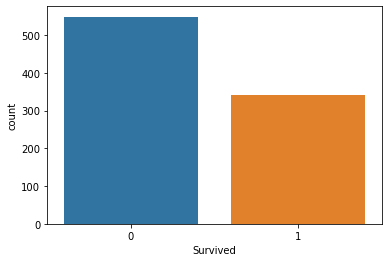

In [12]:
#creating a bar plot
sns.countplot(x=train_df['Survived'])
plt.show()

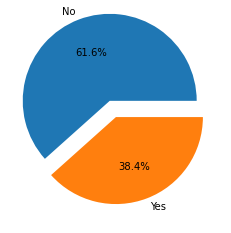

In [13]:
#creating a pie chart to show how much percentage of total people survived
plt.pie(survived_count,labels=['No','Yes'],autopct='%0.1f%%',explode=(0.2,0))
plt.show()

In [14]:
#dropping irrelevant columns
train_df=train_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)   #cabin has more than 70% null value

### let's check which gender is survived more

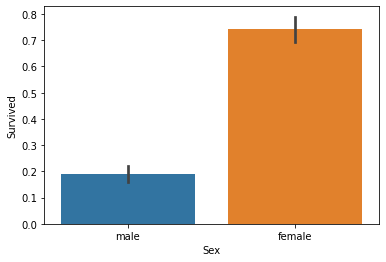

In [15]:
#lets check which gender is attrition is more using bar plot
sns.barplot(x='Sex',y='Survived', data=train_df)
plt.show()

### let's check which Pclass is survived more

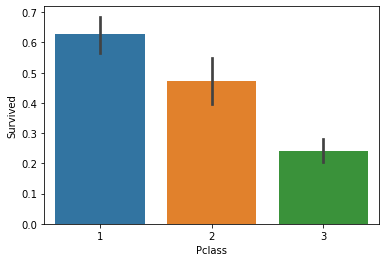

In [16]:
sns.barplot(x='Pclass',y='Survived', data=train_df)
plt.show()

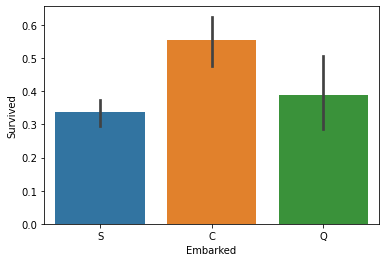

In [17]:
#checking for embarked
sns.barplot(x='Embarked',y='Survived', data=train_df)
plt.show()

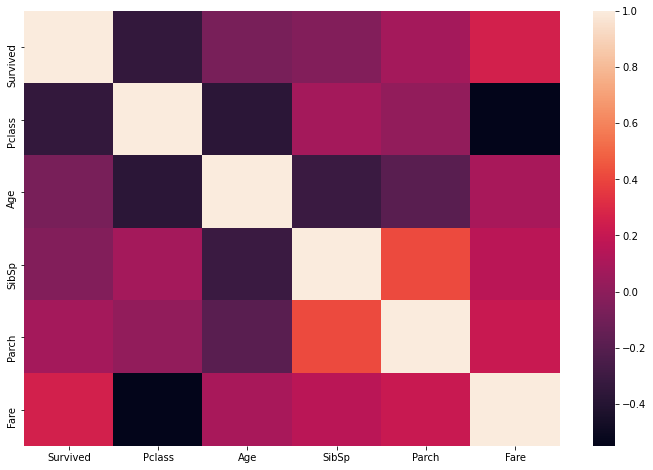

In [18]:
#creating a heatmap and show the relationship between different variable with survived variable
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr())
plt.show()

# Data Preprocessing

In [19]:
#checking our new dataset
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [20]:
#changing categorical value to numeric value using dummies in sex column
sex_dummies=pd.get_dummies(train_df['Sex'])
sex_dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [21]:
#concat the both dataframe in columnwise
train_df=pd.concat([train_df,sex_dummies],axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [22]:
#dropping sex and femalie column becuase using only male we can do the same task
train_df=train_df.drop(['Sex','female','Embarked','Age'],axis=1)

In [23]:
train_df.head()

,Survived,Pclass,SibSp,Parch,Fare,male
0,0,3,1,0,7.2500,1
1,1,1,1,0,71.2833,0
2,1,3,0,0,7.9250,0
3,1,1,1,0,53.1000,0
4,0,3,0,0,8.0500,1


In [24]:
train_df.head()

,Survived,Pclass,SibSp,Parch,Fare,male
0,0,3,1,0,7.2500,1
1,1,1,1,0,71.2833,0
2,1,3,0,0,7.9250,0
3,1,1,1,0,53.1000,0
4,0,3,0,0,8.0500,1


# Data Modeling

In [25]:
#importing libraies
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [26]:
x=train_df.drop(['Survived'],axis=1)
y=train_df['Survived']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, Y_train)
# Y_pred = random_forest.predict(X_test)
# random_forest.score(X_train, Y_train)
# acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
# acc_random_forest

In [29]:
x_train.head()

,Pclass,SibSp,Parch,Fare,male
857,1,0,0,26.5500,1
52,1,1,0,76.7292,0
386,3,5,2,46.9000,1
124,1,0,1,77.2875,1
578,3,1,0,14.4583,0


In [30]:
y_train.head()

857    1
52     1
386    0
124    0
578    0
Name: Survived, dtype: int64

In [31]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [32]:
rf.score(x_train,y_train)

0.9101123595505618

### Predicting for x_test

In [33]:
pred=rf.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
round(accuracy_score(y_test,pred)*100,2)

83.21

## accuracy of the model is 83.24%

### now checking for test.csv file

In [36]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
pred_df=test_df.drop(['PassengerId','Name','Age','Ticket','Cabin','Embarked'],axis=1)

In [38]:
pred_df.head()

,Pclass,Sex,SibSp,Parch,Fare
0,3,male,0,0,7.8292
1,3,female,1,0,7.0000
2,2,male,0,0,9.6875
3,3,male,0,0,8.6625
4,3,female,1,1,12.2875


In [39]:
sex_dummies=pd.get_dummies(pred_df['Sex'])

In [40]:
sex_dummies

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [41]:
pred_df=pd.concat([pred_df,sex_dummies],axis=1)

In [42]:
pred_df.head()

,Pclass,Sex,SibSp,Parch,Fare,female,male
0,3,male,0,0,7.8292,0,1
1,3,female,1,0,7.0000,1,0
2,2,male,0,0,9.6875,0,1
3,3,male,0,0,8.6625,0,1
4,3,female,1,1,12.2875,1,0


In [43]:
pred_df=pred_df.drop(['Sex','female'],axis=1)

In [44]:
pred_df.head()

,Pclass,SibSp,Parch,Fare,male
0,3,0,0,7.8292,1
1,3,1,0,7.0000,0
2,2,0,0,9.6875,1
3,3,0,0,8.6625,1
4,3,1,1,12.2875,0


In [45]:
pred_df.isnull().sum()

Pclass    0
SibSp     0
Parch     0
Fare      1
male      0
dtype: int64

In [46]:
pred_df.dropna(inplace=True)

In [47]:
pred_df.isnull().sum()

Pclass    0
SibSp     0
Parch     0
Fare      0
male      0
dtype: int64

In [48]:
pred_value=rf.predict(pred_df)

In [49]:
#checking for null values in test.csv
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#drop null value from fare column beacuse of this number are prediction rows mismatch

In [50]:
test_df=test_df.dropna(axis=0, subset=['Fare'])

In [51]:
len(pred_value)

417

In [52]:
len(test_df)

417

In [53]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [56]:
pred_test_df=test_df

In [57]:
pred_test_df['Survived']=pred_value

In [58]:
pred_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [59]:
pred_test_df['Survived'].value_counts()

0    272
1    145
Name: Survived, dtype: int64

In [60]:
pred_test_df.to_csv("/home/md/Desktop/Datasets/q1 data/pred_test.csv")

# Downloading the file as pred_test.csv